Section 3.1 – Introducing Pandas Objects


1. Create a Series from a list of exam scores. Assign student names as the index. Then find:

    The top scorer

    All students scoring above the mean

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define data
scores = [81, 94, 79, 85, 100, 92, 88, 76, 95, 89]
students = ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah', 'Ian', 'Jack']

# Create Series
exam_scores = pd.Series(scores, index=students)
print("Exam Scores Series:\n", exam_scores)

# Find the top scorer
top_scorer = exam_scores.idxmax()

print("\nTop Scorer:")
print(f"{top_scorer} with a score of {exam_scores.max()}")

# Students scoring above the mean
mean_score = exam_scores.mean()
above_mean = exam_scores[exam_scores > mean_score]
print(f"Students scoring above the mean: {mean_score} \n", above_mean)


Exam Scores Series:
 Alice       81
Bob         94
Charlie     79
David       85
Eva        100
Frank       92
Grace       88
Hannah      76
Ian         95
Jack        89
dtype: int64

Top Scorer:
Eva with a score of 100
Students scoring above the mean: 87.9 
 Bob       94
Eva      100
Frank     92
Grace     88
Ian       95
Jack      89
dtype: int64


2. Create a DataFrame using a dictionary of lists. Include at least 3 columns with different data types. Compute:

    Data types of each column

    Summary statistics

In [11]:
data = {
    'Name' : ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age' : [23, 22, 25, 24, 21],
    'Score' : [81, 94, 79, 85, 100]
}

# Create DataFrame 
df = pd.DataFrame(data)

print("Data Types:\n", df.dtypes)
print("Summary Statistics:\n", df.describe(include='all'))

print("\nDataFrame:\n", df)

Data Types:
 Name     object
Age       int64
Score     int64
dtype: object
Summary Statistics:
          Name        Age       Score
count       5   5.000000    5.000000
unique      5        NaN         NaN
top     Alice        NaN         NaN
freq        1        NaN         NaN
mean      NaN  23.000000   87.800000
std       NaN   1.581139    8.927486
min       NaN  21.000000   79.000000
25%       NaN  22.000000   81.000000
50%       NaN  23.000000   85.000000
75%       NaN  24.000000   94.000000
max       NaN  25.000000  100.000000

DataFrame:
       Name  Age  Score
0    Alice   23     81
1      Bob   22     94
2  Charlie   25     79
3    David   24     85
4      Eva   21    100


3. Load a CSV file into a DataFrame. Perform the following:

    Display the first and last 5 rows
    
    Show .info() and .describe()



In [13]:
df_csv = pd.read_csv('students.csv')

# Display first and last 5 rows
print("First 5 Rows:\n", df_csv.head())
print("Last 5 Rows:\n", df_csv.tail())

# .info() and .describe()
print("Info:\n")
df_csv.info()

print("\nDescribe:\n", df_csv.describe(include='all'))

First 5 Rows:
      ID First Name Last Name  Age Gender Grade                      Email
0  1001       Emma   Johnson   16      F    A-   emma.johnson@example.com
1  1002       Liam  Williams   17      M    B+  liam.williams@example.com
2  1003     Olivia     Brown   16      F     A   olivia.brown@example.com
3  1004       Noah     Jones   15      M     B     noah.jones@example.com
4  1005        Ava    Garcia   17      F    A+     ava.garcia@example.com
Last 5 Rows:
      ID First Name  Last Name  Age Gender Grade  \
5  1006     Elijah     Miller   16      M    B-   
6  1007     Sophia      Davis   16      F     A   
7  1008      James   Martinez   15      M    C+   
8  1009   Isabella  Hernandez   17      F    A-   
9  1010   Benjamin      Lopez   16      M    B+   

                            Email  
5       elijah.miller@example.com  
6        sophia.davis@example.com  
7      james.martinez@example.com  
8  isabella.hernandez@example.com  
9      benjamin.lopez@example.com  
Info

4. Create a Series with datetime indices. Slice the series using index-based access to retrieve data from a given date range.

In [20]:
import numpy as np

# Date range
dates = pd.date_range('2025-01-01', periods=6)
values = pd.Series(np.random.randint(60, 100, size=6), index=dates)
print("Datetime Series:\n", values)


# Slice from Jan 3 to Jan 5
sliced = values['2025-01-03':'2025-01-05']
print("Sliced Data:\n", sliced)



Datetime Series:
 2025-01-01    99
2025-01-02    96
2025-01-03    97
2025-01-04    90
2025-01-05    72
2025-01-06    73
Freq: D, dtype: int64
Sliced Data:
 2025-01-03    97
2025-01-04    90
2025-01-05    72
Freq: D, dtype: int64


5. Demonstrate basic arithmetic on two Series with non-aligned indices. Discuss the output and the role of index alignment.

In [ ]:
s1 = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
s2 = pd.Series([1, 2, 3], index=['b', 'c', 'd'])

result = s1 + s2
print("Series 1:\n", s1)
print("Series 2:\n", s2)
print("Result of Addition:\n", result)


# Discuss the output and the role of index alignment.
"""
The output shows that the addition of two Series with different indices results in NaN for the indices that do not match.
This is due to index alignment, where Pandas aligns the indices of the two Series before performing the operation.
This means that if an index exists in one Series but not the other, the result will be NaN for that index.
"""

Series 1:
 a    10
b    20
c    30
dtype: int64
Series 2:
 b    1
c    2
d    3
dtype: int64
Result of Addition:
 a     NaN
b    21.0
c    32.0
d     NaN
dtype: float64


Section 3.2 – Data Indexing and Selection

1. Demonstrate the difference between .loc and .iloc using a custom DataFrame.


In [26]:
import pandas as pd

# Sample data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [24, 27, 22, 32],
    'Score': [88, 91, 79, 85]
}

# Custom row labels
df = pd.DataFrame(data, index=['s1', 's2', 's3', 's4'])
print("Custom DataFrame:\n", df)

# Access a single row by label
print("\n.loc['s2']:\n", df.loc['s2'])

# Access multiple rows by label
print("\n.loc[['s2', 's4']]:\n", df.loc[['s2', 's4']])

# Access specific rows and columns by labels
print("\n.loc['s1', 'Name']:", df.loc['s1', 'Name'])

# Access a single row by position
print("\n.iloc[1]:\n", df.iloc[1])

# Access multiple rows by position
print("\n.iloc[[1, 3]]:\n", df.iloc[[1, 3]])

# Access specific element by row and column index
print("\n.iloc[0, 0]:", df.iloc[0, 0])  # Row 0, Column 0

Custom DataFrame:
        Name  Age  Score
s1    Alice   24     88
s2      Bob   27     91
s3  Charlie   22     79
s4    David   32     85

.loc['s2']:
 Name     Bob
Age       27
Score     91
Name: s2, dtype: object

.loc[['s2', 's4']]:
      Name  Age  Score
s2    Bob   27     91
s4  David   32     85

.loc['s1', 'Name']: Alice

.iloc[1]:
 Name     Bob
Age       27
Score     91
Name: s2, dtype: object

.iloc[[1, 3]]:
      Name  Age  Score
s2    Bob   27     91
s4  David   32     85

.iloc[0, 0]: Alice


2. Use conditional logic to filter rows in a DataFrame based on values in one or more columns.

In [ ]:
# Filter: Students with Score > 85
high_scores = df[df['Score'] > 85]
print("\nStudents with Score > 85:\n", high_scores)

# Students aged 20 AND score above 90
age_and_score = df[(df['Age'] > 20) & (df['Score'] > 90)]
print("\nStudents with age > 20 with Score > 90:\n", age_and_score)



Students with Score > 85:
      Name  Age  Score
s1  Alice   24     88
s2    Bob   27     91

Students whos age > 20 with Score > 90:
    Name  Age  Score
s2  Bob   27     91


3. Create a boolean mask to find all elements in a DataFrame greater than a threshold.



In [ ]:
import pandas as pd

# Sample data
data = {
    'Math': [78, 85, 92],
    'Science': [83, 89, 95],
    'English': [75, 80, 78]
}

df = pd.DataFrame(data, index=['Alice', 'Bob', 'Charlie'])
print("Original DataFrame:\n", df)

threshold = 85
mask = df > threshold
print("\nBoolean Mask (values > 85):\n", mask)


Original DataFrame:
          Math  Science  English
Alice      78       83       75
Bob        85       89       80
Charlie    92       95       78

Boolean Mask (values > 85):
           Math  Science  English
Alice    False    False    False
Bob      False     True    False
Charlie   True     True    False


4. Demonstrate chained indexing pitfalls and explain how to use .copy() to avoid them.

In [39]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Score': [88, 92, 79, 85]
}

df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

"""
Chained indexing is when you use multiple brackets or accesses one after another, like:
df[df['Score'] > 90]['Score'] = 100
MIGHT NOT WORK!!!
"""

df.loc[df['Score'] > 90, 'Score'] = 100
print("\nModified DataFrame:\n", df)

"""
df['Score'] > 90 creates a mask and returns a new temporary DataFrame.

['Score'] = 100 is modifying that temp object, not the original df.
"""

# Make a safe copy of filtered rows
high_scores = df[df['Score'] > 90].copy()
high_scores['Score'] = 105
print("\nHigh Scores DataFrame:\n", high_scores)


Original DataFrame:
       Name  Score
0    Alice     88
1      Bob     92
2  Charlie     79
3    David     85

Modified DataFrame:
       Name  Score
0    Alice     88
1      Bob    100
2  Charlie     79
3    David     85

High Scores DataFrame:
   Name  Score
1  Bob    105


5. Create a DataFrame, set a custom index, and perform row and column slicing using .loc and .iloc.

In [ ]:
import pandas as pd

# Sample data
data = {
    'Subject': ['Math', 'Science', 'English', 'History', 'Art'],
    'Score': [88, 92, 85, 79, 95],
    'Grade': ['B', 'A', 'B', 'C', 'A']
}

# Create DataFrame with custom row labels
df = pd.DataFrame(data, index=['s1', 's2', 's3', 's4', 's5'])
print("Custom-Indexed DataFrame:\n", df)

# Row slicing 
# Taking 2nd to 4th rows
print("\n.loc row slice ('s2' to 's4'):\n", df.loc['s2':'s4'])

# Column slicing 
# Taking first 3 rows and getting the subject and grade column
print("\n.loc row and column slice:\n", df.loc['s1':'s3', ['Subject', 'Grade']])

Custom-Indexed DataFrame:
     Subject  Score Grade
s1     Math     88     B
s2  Science     92     A
s3  English     85     B
s4  History     79     C
s5      Art     95     A

.loc row slice ('s2' to 's4'):
     Subject  Score Grade
s2  Science     92     A
s3  English     85     B
s4  History     79     C

.loc row and column slice:
     Subject Grade
s1     Math     B
s2  Science     A
s3  English     B


Section 3.3 – Index Objects

1. Create a Series with custom index and show that Index objects are immutable.

In [44]:
import pandas as pd

# Custom Series
data = pd.Series([100, 200, 300], index=['a', 'b', 'c'])
print("Series:\n", data)

# Try modifying the index (will raise error)
try:
    data.index[0] = 'z'
except Exception as e:
    print("\n❌ Index is immutable:", e)

Series:
 a    100
b    200
c    300
dtype: int64

❌ Index is immutable: Index does not support mutable operations


2. Generate a hierarchical index for a Series and access subsets of data using multiple levels.


In [47]:
# Multi-level Series
index = pd.MultiIndex.from_tuples([('Math', 'Alice'), ('Math', 'Bob'),
                                   ('Science', 'Alice'), ('Science', 'Bob')])

scores = pd.Series([88, 92, 85, 90], index=index)
print("\nHierarchical Series:\n", scores)

# Access all Math scores
print("\nMath Scores:\n", scores['Math'])

# Access Bob's scores across subjects
print("\nBob's Scores:\n", scores.loc[(slice(None), 'Bob')])



Hierarchical Series:
 Math     Alice    88
         Bob      92
Science  Alice    85
         Bob      90
dtype: int64

Math Scores:
 Alice    88
Bob      92
dtype: int64

Bob's Scores:
 Math       92
Science    90
dtype: int64


3. Create a DataFrame with MultiIndex on rows and perform .swaplevel() and .sort_index().

In [ ]:
arrays = [['Grade 10', 'Grade 10', 'Grade 11', 'Grade 11'],
          ['Alice', 'Bob', 'Alice', 'Bob']]
index = pd.MultiIndex.from_arrays(arrays, names=('Grade', 'Student'))

df = pd.DataFrame({
    'Math': [88, 92, 85, 90],
    'Science': [83, 89, 95, 91]
}, index=index)

print(df)

# Swap levels
swapped = df.swaplevel()
print("\nSwapped Levels:\n", swapped)

# Sort by index
sorted_df = swapped.sort_index()
print("\nSorted DataFrame:\n", sorted_df)

                  Math  Science
Grade    Student               
Grade 10 Alice      88       83
         Bob        92       89
Grade 11 Alice      85       95
         Bob        90       91

Swapped Levels:
                   Math  Science
Student Grade                  
Alice   Grade 10    88       83
Bob     Grade 10    92       89
Alice   Grade 11    85       95
Bob     Grade 11    90       91

Sorted DataFrame:
                   Math  Science
Student Grade                  
Alice   Grade 10    88       83
        Grade 11    85       95
Bob     Grade 10    92       89
        Grade 11    90       91


4. Reset and set index on a DataFrame and analyze the effects of drop and inplace.

In [57]:
# Reset index 
reset_df = df.reset_index()
print("\nReset Index:\n", reset_df)

# Set 'Grade' back as index
set_index_df = reset_df.set_index('Grade')
print("\nSet 'Grade' as index:\n", set_index_df)

# Drop index while resetting 
reset_dropped = df.reset_index(drop=True)
print("\nReset with Drop=True:\n", reset_dropped)

# In-place operation (modify without returning new object)
df_copy = df.copy()
df_copy.reset_index(inplace=True)
print("\nReset index inplace:\n", df_copy)


Reset Index:
       Grade Student  Math  Science
0  Grade 10   Alice    88       83
1  Grade 10     Bob    92       89
2  Grade 11   Alice    85       95
3  Grade 11     Bob    90       91

Set 'Grade' as index:
          Student  Math  Science
Grade                          
Grade 10   Alice    88       83
Grade 10     Bob    92       89
Grade 11   Alice    85       95
Grade 11     Bob    90       91

Reset with Drop=True:
    Math  Science
0    88       83
1    92       89
2    85       95
3    90       91

Reset index inplace:
       Grade Student  Math  Science
0  Grade 10   Alice    88       83
1  Grade 10     Bob    92       89
2  Grade 11   Alice    85       95
3  Grade 11     Bob    90       91


5. Demonstrate arithmetic between DataFrames with mismatched indices and explain automatic alignment.

In [60]:
df1 = pd.DataFrame({'Math': [90, 85]}, index=['Alice', 'Bob'])
df2 = pd.DataFrame({'Math': [80, 95]}, index=['Bob', 'Charlie'])

result = df1 + df2
print("\nArithmetic with Mismatched Indices:\n", result)

"""
Pandas aligns on both rows and columns.

Missing values will result in NaN.

"""



Arithmetic with Mismatched Indices:
           Math
Alice      NaN
Bob      165.0
Charlie    NaN


'\nPandas aligns on both rows and columns.\n\nMissing values will result in NaN.\n\n'

Section 3.4 – Reindexing


1. Reindex a Series to include additional indices and fill the missing values using fill_value and method.


In [ ]:
import pandas as pd

# Original Series
s = pd.Series([100, 200, 300], index=['a', 'b', 'c'])
print("Original Series:\n", s)

# Reindex with additional index 'd' and 'e'
s_reindexed = s.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)
print("\nReindexed with fill_value=0:\n", s_reindexed)

# Reindex using forward-fill method
# foward fill takes the last valid value and fills the missing values from then on
s_ffill = s.reindex(['a', 'b', 'c', 'd', 'e'], method='ffill')
print("\nReindexed with method='ffill':\n", s_ffill)


Original Series:
 a    100
b    200
c    300
dtype: int64

Reindexed with fill_value=0:
 a    100
b    200
c    300
d      0
e      0
dtype: int64

Reindexed with method='ffill':
 a    100
b    200
c    300
d    300
e    300
dtype: int64



2. Reindex a DataFrame’s rows and columns and analyze the shape and null values.


In [62]:
df = pd.DataFrame({
    'Math': [85, 90, 95],
    'Science': [88, 89, 94]
}, index=['Alice', 'Bob', 'Charlie'])

# Reindex rows and add a column
df_reindexed = df.reindex(index=['Alice', 'Bob', 'Charlie', 'David'],
                          columns=['Math', 'Science', 'English'])
print("\nReindexed DataFrame:\n", df_reindexed)

# Analyze shape and nulls
print("\nShape:", df_reindexed.shape)
print("\nNull Values:\n", df_reindexed.isnull())



Reindexed DataFrame:
          Math  Science  English
Alice    85.0     88.0      NaN
Bob      90.0     89.0      NaN
Charlie  95.0     94.0      NaN
David     NaN      NaN      NaN

Shape: (4, 3)

Null Values:
           Math  Science  English
Alice    False    False     True
Bob      False    False     True
Charlie  False    False     True
David     True     True     True



3. Simulate a time series with missing dates. Use reindex() and interpolate() to fill gaps.


In [10]:
import pandas as pd
import numpy as np

dates = pd.date_range(start='2023-01-01', end='2023-01-10', freq='D')

np.random.seed(0)

data = pd.DataFrame({
    'date': dates,
    'value': np.random.randint(10, 100, size=len(dates))
})

data.set_index('date', inplace=True)

# Introduce missing values
data_missing = data.drop(index=['2023-01-03', '2023-01-06', '2023-01-08'])
full_range = pd.date_range(start='2023-01-01', end='2023-01-10', freq='D')
data_reindexed = data_missing.reindex(full_range)
data_interpolated = data_reindexed.interpolate()

print(data)
print("\nAfter reindexing:\n", data_reindexed)
print("\nAfter interpolation:\n", data_interpolated)



            value
date             
2023-01-01     54
2023-01-02     57
2023-01-03     74
2023-01-04     77
2023-01-05     77
2023-01-06     19
2023-01-07     93
2023-01-08     31
2023-01-09     46
2023-01-10     97

After reindexing:
             value
2023-01-01   54.0
2023-01-02   57.0
2023-01-03    NaN
2023-01-04   77.0
2023-01-05   77.0
2023-01-06    NaN
2023-01-07   93.0
2023-01-08    NaN
2023-01-09   46.0
2023-01-10   97.0

After interpolation:
             value
2023-01-01   54.0
2023-01-02   57.0
2023-01-03   67.0
2023-01-04   77.0
2023-01-05   77.0
2023-01-06   85.0
2023-01-07   93.0
2023-01-08   69.5
2023-01-09   46.0
2023-01-10   97.0



4. Write a function that reindexes a Series/DataFrame to a desired index with a selected method.


In [ ]:
def reindex_and_fill(data, new_index, method="interpolate", **kwargs):
    reindexed = data.reindex(new_index)
    if method == "interpolate":
        filled = reindexed.interpolate(**kwargs)
    elif method == "ffill":
        filled = reindexed.ffill(**kwargs)
    elif method == "bfill":
        filled = reindexed.bfill(**kwargs)
    else:
        raise ValueError("Unsupported fill method")
    
    return filled


5. Compare reindex() with sort_index() and sort_values() using sample data.


In [ ]:
import pandas as pd

# Create a sample DataFrame
df = pd.DataFrame({
    'value': [100, 300, 200, 400]
}, index=['d', 'b', 'a', 'c'])

print("Original DataFrame:\n", df)

# Adds new rows and columns with NaN values
df_reindexed = df.reindex(['a', 'b', 'c', 'd', 'e'])
print("\nAfter reindex():\n", df_reindexed)

# Sorts data based on the index (row labels) alphabetically or numerically.
df_sorted_index = df.sort_index()
print("\nAfter sort_index():\n", df_sorted_index)

# Sorts data based on the values in the 'value' column in ascending order
df_sorted_values = df.sort_values(by='value')
print("\nAfter sort_values():\n", df_sorted_values)



Original DataFrame:
    value
d    100
b    300
a    200
c    400

After reindex():
    value
a  200.0
b  300.0
c  400.0
d  100.0
e    NaN

After sort_index():
    value
a    200
b    300
c    400
d    100

After sort_values():
    value
d    100
a    200
b    300
c    400


Section 3.5 – Ufuncs: Index Preservation


1. Apply NumPy universal functions (e.g., np.exp, np.log) to Series and observe index preservation.


In [15]:
import pandas as pd
import numpy as np

s = pd.Series([1, 2, 3, np.nan], index=['a', 'b', 'c', 'd'])

# Apply NumPy functions
exp_s = np.exp(s)
log_s = np.log(s)

print("Original:\n", s)
print("\nnp.exp(s):\n", exp_s)
print("\nnp.log(s):\n", log_s)

Original:
 a    1.0
b    2.0
c    3.0
d    NaN
dtype: float64

np.exp(s):
 a     2.718282
b     7.389056
c    20.085537
d          NaN
dtype: float64

np.log(s):
 a    0.000000
b    0.693147
c    1.098612
d         NaN
dtype: float64



2. Apply element-wise operations on two Series with partially overlapping indices.


In [16]:
s1 = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
s2 = pd.Series([1, 2, 3], index=['b', 'c', 'd'])
result = s1 + s2
print(result)

a     NaN
b    21.0
c    32.0
d     NaN
dtype: float64



3. Use np.where on a Series to apply conditional logic in a vectorized fashion.


In [18]:
s = pd.Series([1, 2, 3], index=['a','b','c'])

labels = np.where(s > 1, 'greater than 1', 'less than or equal to 1')
labeled_series = pd.Series(labels, index=s.index)
print(labeled_series)

a    less than or equal to 1
b             greater than 1
c             greater than 1
dtype: object



4. Create a function that applies a ufunc and returns a cleaned result (handling NaNs and type changes).


In [20]:
def ufunc(series, func):
    result = func(series)
    result_clean = result.dropna()
    return result_clean.astype(series.dtype) if np.issubdtype(series.dtype, np.number) else result_clean

s = pd.Series([1, 2, 3, np.nan])
cleaned = ufunc(s, np.sqrt)
print(cleaned)


0    1.000000
1    1.414214
2    1.732051
dtype: float64



5. Compare element-wise operations on Series vs. NumPy arrays. Discuss indexing and performance.


In [ ]:
arr = np.random.rand(1_000_000)
series = pd.Series(arr)

# Time NumPy
%timeit arr * 2

# Time Pandas
%timeit series * 2

"""
NumPy is faster (~25–40%) because it's lower-level and doesn't handle labels or alignment.

Pandas adds overhead for rich features like indexing, alignment, and NaN handling.
"""


184 μs ± 5.39 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
232 μs ± 10.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Section 3.6 – Operating on Data in Pandas


1. Apply arithmetic operations to a DataFrame and demonstrate broadcasting across rows/columns.


In [26]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'Math': [80, 90, 70],
    'Science': [85, 95, 75]
}, index=['Alice', 'Bob', 'Charlie'])

print("Original DataFrame:\n", df)

# Broadcast a Series across columns (row-wise operation)
row_adjustment = pd.Series([5, -3, 10], index=df.index)
df_adjusted = df.add(row_adjustment, axis=0)
print("\nRow-wise Adjustment:\n", df_adjusted)

# Broadcast a Series across rows (column-wise operation)     
column_weights = pd.Series({'Math': 0.6, 'Science': 0.4})
df_weighted = df.mul(column_weights, axis=1)
print("\nColumn-wise Weighted Adjustment:\n", df_weighted)

Original DataFrame:
          Math  Science
Alice      80       85
Bob        90       95
Charlie    70       75

Row-wise Adjustment:
          Math  Science
Alice      85       90
Bob        87       92
Charlie    80       85

Column-wise Weighted Adjustment:
          Math  Science
Alice    48.0     34.0
Bob      54.0     38.0
Charlie  42.0     30.0



2. Use .add(), .sub(), .div(), etc., to perform safe arithmetic with fill values.


In [31]:
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'B': [10, 20], 'C': [30, 40]})

safe_add = df1.add(df2, fill_value=0)
print("\nSafe Addition with fill_value=0:\n", safe_add)


Safe Addition with fill_value=0:
      A   B     C
0  1.0  13  30.0
1  2.0  24  40.0



3. Calculate row-wise and column-wise statistics (mean, sum, std, etc.) using .agg() and .apply().


In [32]:
# Column-wise stats
col_stats = df.agg(['mean', 'std', 'sum'])
print("\nColumn-wise Statistics:\n", col_stats)

# Row-wise stats
row_stats = df.agg(['mean', 'std', 'sum'], axis=1)
print("\nRow-wise Statistics:\n", row_stats)


Column-wise Statistics:
        Math  Science
mean   80.0     85.0
std    10.0     10.0
sum   240.0    255.0

Row-wise Statistics:
          mean       std    sum
Alice    82.5  3.535534  165.0
Bob      92.5  3.535534  185.0
Charlie  72.5  3.535534  145.0



4. Use axis parameters to normalize each row and column in a DataFrame.


In [33]:
# Normalize columns (axis=0): subtract col mean, divide by col std
norm_cols = (df - df.mean()) / df.std()
print("\nNormalized Columns:\n", norm_cols)

# Normalize rows (axis=1): subtract row mean, divide by row std
norm_rows = df.sub(df.mean(axis=1), axis=0).div(df.std(axis=1), axis=0)

print("\nColumn-wise normalized (z-score):\n", norm_cols)
print("\nRow-wise normalized (z-score):\n", norm_rows)



Normalized Columns:
          Math  Science
Alice     0.0      0.0
Bob       1.0      1.0
Charlie  -1.0     -1.0

Column-wise normalized (z-score):
          Math  Science
Alice     0.0      0.0
Bob       1.0      1.0
Charlie  -1.0     -1.0

Row-wise normalized (z-score):
              Math   Science
Alice   -0.707107  0.707107
Bob     -0.707107  0.707107
Charlie -0.707107  0.707107



5. Create a function that accepts a DataFrame and returns a standardized (z-score normalized) version.


In [ ]:
def zscore_standardize(series):
    return (series - series.mean()) / series.std()


Section 3.7 – Handling Missing Data


1. Create a DataFrame with intentional NaN values. Use .isnull() and .notnull() to locate them.


In [35]:
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Math': [85, np.nan, 78, 92],
    'Science': [np.nan, 88, np.nan, 95],
    'English': [75, 85, 80, np.nan]
})

print("\n.isnull():\n", df.isnull())
print("\n.notnull():\n", df.notnull())



.isnull():
     Name   Math  Science  English
0  False  False     True    False
1  False   True    False    False
2  False  False     True    False
3  False  False    False     True

.notnull():
    Name   Math  Science  English
0  True   True    False     True
1  True  False     True     True
2  True   True    False     True
3  True   True     True    False



2. Drop rows or columns with missing data using dropna() with different thresholds.


In [36]:
dropped_any = df.dropna()
dropped_thresh = df.dropna(thresh=2)
dropped_cols = df.dropna(axis=1, how='all')

print("\nDrop rows with any NaN:\n", dropped_any)
print("\nDrop rows with at least 2 non-NaNs:\n", dropped_thresh)
print("\nDrop columns with all NaNs:\n", dropped_cols)



Drop rows with any NaN:
 Empty DataFrame
Columns: [Name, Math, Science, English]
Index: []

Drop rows with at least 2 non-NaNs:
       Name  Math  Science  English
0    Alice  85.0      NaN     75.0
1      Bob   NaN     88.0     85.0
2  Charlie  78.0      NaN     80.0
3    David  92.0     95.0      NaN

Drop columns with all NaNs:
       Name  Math  Science  English
0    Alice  85.0      NaN     75.0
1      Bob   NaN     88.0     85.0
2  Charlie  78.0      NaN     80.0
3    David  92.0     95.0      NaN



3. Fill missing data using constant values, forward-fill, and backward-fill.


In [37]:
# Fill with a constant
filled_constant = df.fillna(0)

# Forward-fill (propagate previous value)
filled_ffill = df.fillna(method='ffill')

# Backward-fill (propagate next value)
filled_bfill = df.fillna(method='bfill')

print("\nFill with constant 0:\n", filled_constant)
print("\nForward-fill:\n", filled_ffill)
print("\nBackward-fill:\n", filled_bfill)


Fill with constant 0:
       Name  Math  Science  English
0    Alice  85.0      0.0     75.0
1      Bob   0.0     88.0     85.0
2  Charlie  78.0      0.0     80.0
3    David  92.0     95.0      0.0

Forward-fill:
       Name  Math  Science  English
0    Alice  85.0      NaN     75.0
1      Bob  85.0     88.0     85.0
2  Charlie  78.0     88.0     80.0
3    David  92.0     95.0     80.0

Backward-fill:
       Name  Math  Science  English
0    Alice  85.0     88.0     75.0
1      Bob  78.0     88.0     85.0
2  Charlie  78.0     95.0     80.0
3    David  92.0     95.0      NaN


/tmp/ipykernel_1948/1007365248.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_ffill = df.fillna(method='ffill')
/tmp/ipykernel_1948/1007365248.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_bfill = df.fillna(method='bfill')



4. Use .interpolate() on time series data with gaps.


In [38]:
# Time-indexed data with gaps
date_range = pd.date_range('2023-01-01', periods=6, freq='D')
ts = pd.Series([1, np.nan, np.nan, 4, np.nan, 6], index=date_range)
print("\nTime Series with Gaps:\n", ts)
# Interpolate missing values
ts_interpolated = ts.interpolate(method='time')
print("\nInterpolated Time Series:\n", ts_interpolated)


Time Series with Gaps:
 2023-01-01    1.0
2023-01-02    NaN
2023-01-03    NaN
2023-01-04    4.0
2023-01-05    NaN
2023-01-06    6.0
Freq: D, dtype: float64

Interpolated Time Series:
 2023-01-01    1.0
2023-01-02    2.0
2023-01-03    3.0
2023-01-04    4.0
2023-01-05    5.0
2023-01-06    6.0
Freq: D, dtype: float64



5. Create a reusable cleaning pipeline using functions that handle missing values in different ways.


In [41]:
def clean_missing_data(df, strategy='fill', value=None, method=None, axis=0, thresh=None):
    """
    Clean missing data in a DataFrame.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame.
        strategy (str): 'drop' to drop rows/columns, 'fill' to fill NaNs.
        value (any): Value to fill NaNs with (if strategy='fill').
        method (str): Method for filling ('ffill', 'bfill', 'interpolate').
        axis (int): Axis to drop along (0 for rows, 1 for columns).
        thresh (int): Minimum number of non-NaN values required to keep the row/column.
    
    Returns:
        pd.DataFrame: Cleaned DataFrame.
    """
    if strategy == 'drop':
        return df.dropna(axis=axis, thresh=thresh)
    elif strategy == 'fill':
        if method:
            return df.fillna(method=method)
        else:
            return df.fillna(value=value)
    else:
        raise ValueError("Invalid strategy. Use 'drop' or 'fill'.")

Section 3.8 – Hierarchical Indexing


1. Construct a MultiIndex DataFrame and select data using tuple-based indexing.


In [47]:
import pandas as pd
import numpy as np

# Create MultiIndex
arrays = [
    ['Math', 'Math', 'Science', 'Science'],
    ['Midterm', 'Final', 'Midterm', 'Final']
]
index = pd.MultiIndex.from_arrays(arrays, names=['Subject', 'Exam'])

# Create DataFrame
df = pd.DataFrame(
    {
        'Alice': [85, 90, 88, 92],
        'Bob': [78, 82, 80, 85]
    },
    index=index
)

print("MultiIndex DataFrame:\n", df)

# Select using tuple-based indexing
print("\nAlice's Science Final score:", df.loc[('Science', 'Final'), 'Alice'])


MultiIndex DataFrame:
                  Alice  Bob
Subject Exam               
Math    Midterm     85   78
        Final       90   82
Science Midterm     88   80
        Final       92   85

Alice's Science Final score: 92



2. Use .stack() and .unstack() to reshape a MultiIndex DataFrame.


In [48]:
# Stack (move columns to row index)
stacked = df.stack()
print("\nStacked DataFrame:\n", stacked)

# Unstack (move inner row index to columns)
unstacked = df.unstack()
print("\nUnstacked DataFrame:\n", unstacked)



Stacked DataFrame:
 Subject  Exam          
Math     Midterm  Alice    85
                  Bob      78
         Final    Alice    90
                  Bob      82
Science  Midterm  Alice    88
                  Bob      80
         Final    Alice    92
                  Bob      85
dtype: int64

Unstacked DataFrame:
         Alice           Bob        
Exam    Final Midterm Final Midterm
Subject                            
Math       90      85    82      78
Science    92      88    85      80



3. Use .xs() to extract cross-sections from a MultiIndex structure.


In [49]:
# Get all 'Midterm' exams
midterms = df.xs('Midterm', level='Exam')
print("\nAll Midterm scores:\n", midterms)

# Get all exams for 'Math'
math = df.xs('Math', level='Subject')
print("\nAll Math exam scores:\n", math)



All Midterm scores:
          Alice  Bob
Subject            
Math        85   78
Science     88   80

All Math exam scores:
          Alice  Bob
Exam               
Midterm     85   78
Final       90   82



4. Demonstrate aggregation over a MultiIndex using .groupby(level=...).


In [50]:
# Mean score per subject
subject_means = df.groupby(level='Subject').mean()
print("\nMean score per subject:\n", subject_means)

# Mean score per exam type
exam_means = df.groupby(level='Exam').mean()
print("\nMean score per exam type:\n", exam_means)



Mean score per subject:
          Alice   Bob
Subject             
Math      87.5  80.0
Science   90.0  82.5

Mean score per exam type:
          Alice   Bob
Exam                
Final     91.0  83.5
Midterm   86.5  79.0



5. Modify levels with .rename_axis() and flatten the MultiIndex.



In [51]:
df_renamed = df.rename_axis(index={'Subject': 'Course', 'Exam': 'Test'})
print("\nRenamed index levels:\n", df_renamed)

# Flatten index
df_flat = df.copy()
df_flat.index = ['_'.join(tup) for tup in df_flat.index]
print("\nFlattened MultiIndex:\n", df_flat)



Renamed index levels:
                  Alice  Bob
Course  Test               
Math    Midterm     85   78
        Final       90   82
Science Midterm     88   80
        Final       92   85

Flattened MultiIndex:
                  Alice  Bob
Math_Midterm        85   78
Math_Final          90   82
Science_Midterm     88   80
Science_Final       92   85


Section 3.9 – Concat and Append


1. Concatenate Series and DataFrames along different axes using pd.concat().


In [53]:
import pandas as pd

s1 = pd.Series([1, 2, 3], name='A')
s2 = pd.Series([4, 5, 6], name='B')

# Concatenate vertically (axis=0, default)
concat_vert = pd.concat([s1, s2])
print("\nVertical Series concat:\n", concat_vert)

# Concatenate horizontally (axis=1)
concat_horiz = pd.concat([s1, s2], axis=1)
print("\n Horizontal Series concat:\n", concat_horiz)



Vertical Series concat:
 0    1
1    2
2    3
0    4
1    5
2    6
dtype: int64

 Horizontal Series concat:
    A  B
0  1  4
1  2  5
2  3  6



2. Demonstrate keys= and names= parameters in concatenation.


In [55]:
df1 = pd.DataFrame({'value': [100, 200]}, index=['a', 'b'])
df2 = pd.DataFrame({'value': [300, 400]}, index=['a', 'b'])

# Concatenate with keys to make a MultiIndex
concat_with_keys = pd.concat([df1, df2], keys=['Group1', 'Group2'], names=['Group', 'Index'])

print("\n Concatenation with keys and names:\n", concat_with_keys)



 Concatenation with keys and names:
               value
Group  Index       
Group1 a        100
       b        200
Group2 a        300
       b        400



3. Append rows to a DataFrame using .append() and contrast with pd.concat().


In [62]:

row = pd.DataFrame({'value': [999]}, index=['c'])

"""
Append seems to be deprecated and gives an error now
"""

# pd.concat
concatenated = pd.concat([df1, row])

print("\n✅ concat() result:\n", concatenated)



✅ concat() result:
    value
a    100
b    200
c    999



4. Concatenate DataFrames with overlapping and non-overlapping columns and observe output.


In [63]:
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'B': [5, 6], 'C': [7, 8]})

concat_mixed = pd.concat([df1, df2], ignore_index=True)
print("\nConcatenation with different columns:\n", concat_mixed)



Concatenation with different columns:
      A  B    C
0  1.0  3  NaN
1  2.0  4  NaN
2  NaN  5  7.0
3  NaN  6  8.0



5. Write a function to combine a list of DataFrames and clean resulting index/columns.


In [65]:
def combine_and_clean(dfs, reset_index=True, fillna_value=None):
    """
    Combine multiple DataFrames and clean missing values.
    
    Parameters:
        dfs (list of pd.DataFrame): List of DataFrames to combine.
        reset_index (bool): Whether to reset the index after concatenation.
        fillna_value (any): Value to fill NaNs with after concatenation.
    
    Returns:
        pd.DataFrame: Combined and cleaned DataFrame.
    """
    combined = pd.concat(dfs, ignore_index=reset_index)
    if fillna_value is not None:
        combined.fillna(fillna_value, inplace=True)
    return combined

df1 = pd.DataFrame({'A': [1], 'B': [2]})
df2 = pd.DataFrame({'A': [3], 'C': [4]})

cleaned_df = combine_and_clean([df1, df2], reset_index=True, fillna_value=0)
print("\nCombined & cleaned DataFrame:\n", cleaned_df)



Combined & cleaned DataFrame:
    A    B    C
0  1  2.0  0.0
1  3  0.0  4.0


Section 3.10 – Merging and Joining

1. Merge two DataFrames with a one-to-one relationship using a common column.


In [66]:
# Create DataFrames
df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie']
})
df2 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Age': [24, 30, 25]
})

# Merge on the 'ID' column (one-to-one relationship)
merged_one_to_one = pd.merge(df1, df2, on='ID')

print("One-to-one merge:\n", merged_one_to_one)


One-to-one merge:
    ID     Name  Age
0   1    Alice   24
1   2      Bob   30
2   3  Charlie   25



2. Perform many-to-one and many-to-many merges and explain the results.


In [ ]:
df3 = pd.DataFrame({
    'ID': [1, 1, 2, 2, 3],
    'Score': [85, 90, 88, 95, 78]
})

# Perform Many-to-One merge (df3 has multiple entries for each ID)
merged_many_to_one = pd.merge(df3, df2, on='ID')
print("\nMany-to-one merge:\n", merged_many_to_one)

"""
One row in df2 for each ID in df3.
The result will have multiple rows for each ID in df2.
"""

df4 = pd.DataFrame({
    'ID': [1, 2, 3, 1],
    'Subject': ['Math', 'Science', 'English', 'History']
})
# Perform Many-to-Many merge (both df3 and df4 have duplicate IDs)
merged_many_to_many = pd.merge(df3, df4, on='ID')

print("\n🔀 Many-to-many merge:\n", merged_many_to_many)

"""
Many rows in df3 for each ID in df4 and vice versa.
The result will have all combinations of matching rows.
"""


Many-to-one merge:
    ID  Score  Age
0   1     85   24
1   1     90   24
2   2     88   30
3   2     95   30
4   3     78   25

🔀 Many-to-many merge:
    ID  Score  Subject
0   1     85     Math
1   1     85  History
2   1     90     Math
3   1     90  History
4   2     88  Science
5   2     95  Science
6   3     78  English



3. Use on=, left_on=, right_on=, and suffixes= parameters for disambiguation.


In [70]:
# DataFrames with different column names
df5 = pd.DataFrame({
    'EmployeeID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie']
})
df6 = pd.DataFrame({
    'StaffID': [1, 2, 3],
    'Salary': [1000, 1200, 1100]
})

# Merge on different column names using `left_on` and `right_on`
merged_on_diff_names = pd.merge(df5, df6, left_on='EmployeeID', right_on='StaffID')

print("\nMerge on different column names:\n", merged_on_diff_names)



Merge on different column names:
    EmployeeID     Name  StaffID  Salary
0           1    Alice        1    1000
1           2      Bob        2    1200
2           3  Charlie        3    1100



4. Join DataFrames on their index using .join() with different join methods.


In [72]:
# DataFrames to join on index
df7 = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [24, 30, 25]
}, index=[1, 2, 3])

df8 = pd.DataFrame({
    'Salary': [1000, 1200, 1100]
}, index=[1, 2, 3])

# Join DataFrames on index (default is left join)
joined_index = df7.join(df8)
print("\nJoin DataFrames on index:\n", joined_index)

# Join with different join methods: 'left', 'right', 'outer', 'inner'
outer_join = df7.join(df8, how='outer')
print("\nOuter join:\n", outer_join)

inner_join = df7.join(df8, how='inner')
print("\nInner join:\n", inner_join)


Join DataFrames on index:
       Name  Age  Salary
1    Alice   24    1000
2      Bob   30    1200
3  Charlie   25    1100

Outer join:
       Name  Age  Salary
1    Alice   24    1000
2      Bob   30    1200
3  Charlie   25    1100

Inner join:
       Name  Age  Salary
1    Alice   24    1000
2      Bob   30    1200
3  Charlie   25    1100



5. Merge three or more DataFrames and track source using indicator=True.


In [73]:
df9 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie']
})
df10 = pd.DataFrame({
    'ID': [1, 2],
    'Age': [24, 30]
})
df11 = pd.DataFrame({
    'ID': [2, 3],
    'Salary': [1000, 1200]
})

merged_three = df9.merge(df10, on='ID').merge(df11, on='ID', how='outer')
print("\nMerge three DataFrames:\n", merged_three)



Merge three DataFrames:
    ID   Name   Age  Salary
0   1  Alice  24.0     NaN
1   2    Bob  30.0  1000.0
2   3    NaN   NaN  1200.0


Section 3.11 – Example: US States Data


1. Load state area, abbreviation, and population data from CSV files.

In [ ]:
df_area_population = pd.read_csv('state_population.csv')
df_state_names = pd.read_csv('state_names.csv')

# Display the loaded DataFrames
print("State Area, Abbreviation, and Population Data:\n", df_area_population)
print("\nState Names Data:\n", df_state_names)

State Area, Abbreviation, and Population Data:
             State Abbreviation    Area  Population
0      California           CA  163696    39512223
1           Texas           TX  268596    28995881
2         Florida           FL   65758    21477737
3        New York           NY   54555    19453561
4    Pennsylvania           PA   46058    12801989
5        Illinois           IL   57914    12671821
6            Ohio           OH   44826    11689100
7         Georgia           GA   59425    10617423
8  North Carolina           NC   53819    10488084
9        Michigan           MI   96714     9986857

State Names Data:
             State
0      California
1           Texas
2         Florida
3        New York
4    Pennsylvania
5        Illinois
6            Ohio
7         Georgia
8  North Carolina
9        Michigan



2. Merge the datasets on state names to create a complete DataFrame.


In [75]:
df_merged = pd.merge(df_state_names, df_area_population, on='State')
print("\nMerged DataFrame:\n", df_merged)


Merged DataFrame:
             State Abbreviation    Area  Population
0      California           CA  163696    39512223
1           Texas           TX  268596    28995881
2         Florida           FL   65758    21477737
3        New York           NY   54555    19453561
4    Pennsylvania           PA   46058    12801989
5        Illinois           IL   57914    12671821
6            Ohio           OH   44826    11689100
7         Georgia           GA   59425    10617423
8  North Carolina           NC   53819    10488084
9        Michigan           MI   96714     9986857


3. Compute population density and filter top 10 most densely populated states.

In [77]:
# Calculate population density (Population / Area)
df_merged['Density'] = df_merged['Population'] / df_merged['Area']
print("\nPopulation Density:\n", df_merged[['State', 'Density']])

# Sort by Density and get the top 10
top_10_dense_states = df_merged.sort_values(by='Density', ascending=False).head(10)

# Display top 10 densely populated states
print("\nTop 10 Most Densely Populated States:\n", top_10_dense_states)



Population Density:
             State     Density
0      California  241.375617
1           Texas  107.953510
2         Florida  326.617856
3        New York  356.586216
4    Pennsylvania  277.953645
5        Illinois  218.804106
6            Ohio  260.766073
7         Georgia  178.669297
8  North Carolina  194.876977
9        Michigan  103.261751

Top 10 Most Densely Populated States:
             State Abbreviation    Area  Population     Density
3        New York           NY   54555    19453561  356.586216
2         Florida           FL   65758    21477737  326.617856
4    Pennsylvania           PA   46058    12801989  277.953645
6            Ohio           OH   44826    11689100  260.766073
0      California           CA  163696    39512223  241.375617
5        Illinois           IL   57914    12671821  218.804106
8  North Carolina           NC   53819    10488084  194.876977
7         Georgia           GA   59425    10617423  178.669297
1           Texas           TX  268596   



4. Add a categorical column based on population size (e.g., small, medium, large).


In [ ]:
# Define a function to categorize population size
def categorize_population(population):
    if population > 20000000:
        return 'Large'
    elif population > 10000000:
        return 'Medium'
    else:
        return 'Small'

# Apply the function to create a new column
df_merged['Population_Category'] = df_merged['Population'].apply(categorize_population)
pd.set_option('display.width', 1000)

# Display the updated DataFrame
print("\nDataFrame with Population Categories:\n", df_merged)



DataFrame with Population Categories:
             State Abbreviation    Area  Population     Density Population_Category
0      California           CA  163696    39512223  241.375617               Large
1           Texas           TX  268596    28995881  107.953510               Large
2         Florida           FL   65758    21477737  326.617856               Large
3        New York           NY   54555    19453561  356.586216              Medium
4    Pennsylvania           PA   46058    12801989  277.953645              Medium
5        Illinois           IL   57914    12671821  218.804106              Medium
6            Ohio           OH   44826    11689100  260.766073              Medium
7         Georgia           GA   59425    10617423  178.669297              Medium
8  North Carolina           NC   53819    10488084  194.876977              Medium
9        Michigan           MI   96714     9986857  103.261751               Small



5. Visualize state population vs. area using a scatter plot. Highlight states with population > 10 million.



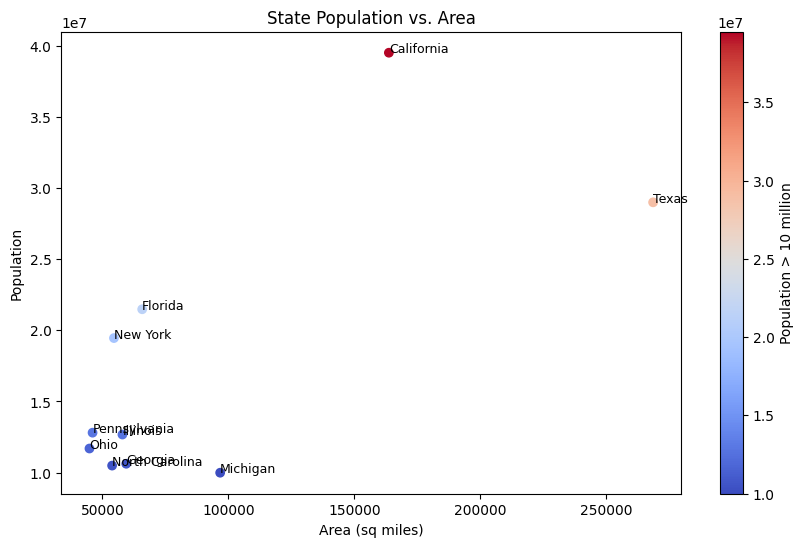

In [88]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Area'], df_merged['Population'], c=df_merged['Population'], cmap='coolwarm')

# Title and labels
plt.title('State Population vs. Area')
plt.xlabel('Area (sq miles)')
plt.ylabel('Population')

# Highlight the states with population > 10 million
for i in range(len(df_merged)):
        plt.annotate(df_merged['State'][i], (df_merged['Area'][i], df_merged['Population'][i]), fontsize=9)

# Show the plot
plt.colorbar(label='Population > 10 million')
plt.show()
